<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [16]</a>'.</span>

## Load dataset

In [1]:
import pandas as pd

path = '../data/energy_cost_2023.xlsx'
df_base = pd.read_excel(path, index_col=0)
df_base

price   energy        cost  year  month  day  hour  \
datetime                                                                  
2023-01-01 00:00:00   0.00  14039.8       0.000  2023      1    1     0   
2023-01-01 01:00:00   0.00  13581.2       0.000  2023      1    1     1   
...                    ...      ...         ...   ...    ...  ...   ...   
2023-12-31 22:00:00  74.74  13223.4  988316.916  2023     12   31    22   
2023-12-31 23:00:00  71.96  12659.1  910948.836  2023     12   31    23   

                     dayofweek  
datetime                        
2023-01-01 00:00:00          6  
2023-01-01 01:00:00          6  
...                        ...  
2023-12-31 22:00:00          6  
2023-12-31 23:00:00          6  

[8760 rows x 8 columns]

## Visual report

### Area plot

In [2]:
pd.options.plotting.backend = "plotly"

In [3]:
df = df_base[['price', 'energy', 'cost']]

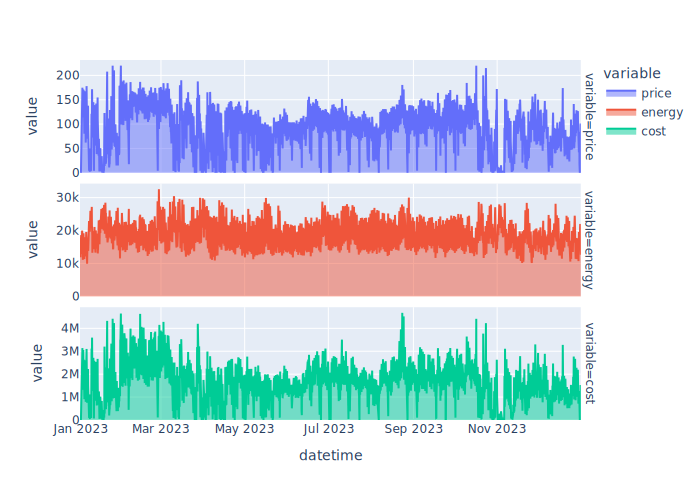

In [4]:
fig = df.plot.area(facet_row='variable')
fig.update_yaxes(matches=None)

### Export to Excel

In [5]:
path = "reports/src/fig.png"
fig.write_image(path, scale=2)

In [6]:
from openpyxl import Workbook
from openpyxl.drawing.image import Image

wb = Workbook()
sheet = wb.active
sheet.title = 'History'

sheet.add_image(Image(path),'A1')

path_excel = 'reports/hour_month.xlsx'
wb.save(path_excel)

## Pivot table

### Aggregation

In [7]:
df = (df_base
 .pivot_table(
     index='hour',
     columns='month',
     values='cost',
     aggfunc='sum'
 )
)

In [8]:
dfs = (df
 .div(1_000_000)
 .style
    .background_gradient(axis=None)
    .format(precision=0)
)

In [9]:
dfs.to_excel('reports/cost_hour_month.xlsx')

### Refactor

In [10]:
def report_hour_month(df_base, values='cost', aggfunc='sum', div=1_000_000, precision=0):

    df = (df_base
        .pivot_table(
            index='hour',
            columns='month',
            values=values,
            aggfunc='sum'
        )
    )
    
    dfs = (df
        .div(div)
        .style
            .background_gradient(axis=None)
            .format(precision=precision)
    )
    
    return dfs

In [11]:
report_hour_month(df_base)

## Replication

In [12]:
reports = {}

In [13]:
column = 'cost'
reports[column] = report_hour_month(df_base, values=column)

In [14]:
column = 'energy'
reports[column] = report_hour_month(df_base, values=column)

In [15]:
column = 'price'
reports[column] = report_hour_month(df_base, values=column, aggfunc='mean', div=1_000, precision=1)

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [16]:
with pd.ExcelWriter(path_excel, mode='a') as writer:
    for sheet_name, report in reports.items():
        report.to_excel(writer, sheet_name=sheet_name, float_format = "%0.1f", freeze_panes=(1,1))

ValueError: Append mode is not supported with xlsxwriter!